In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as PCA

from sklearn.metrics import roc_curve, auc

import sys
import os


In [115]:
## AUC scores will be imported from thier files. Then the Mean will be looked at for each data combination
direc = "created_data/AUC_Scores"

files = {}
for file in os.listdir(direc):
    name = file[:-8] ## remove the _auc.csv part of the filename
    
    files[name] = pd.read_csv(direc + '/' + file, index_col=0)

In [116]:
means = {}
meanDF = pd.DataFrame()

for f in files:
    des = files[f].describe()
    meanDF = meanDF.append(pd.Series.to_frame(des.loc[des.index[1]]).rename(columns={'mean':f}).T)

 

In [117]:
meanDF

,KNN,NB,DT,SVM,MLP
UC,0.787126,0.788256,0.687132,0.685678,0.543941
UCUD,0.916985,0.846848,0.803919,0.542973,0.854395
UCUN,0.916985,0.846848,0.803919,0.543306,0.854395
UCUNUD,0.903497,0.668938,0.531968,0.500052,0.838028
UCUNUDUS,0.903498,0.671222,0.517930,0.504764,0.528577
UCUNUS,0.916985,0.849979,0.812515,0.560393,0.534393
UCUS,0.787133,0.799829,0.700490,0.694953,0.526531
UCUSUD,0.739939,0.647087,0.501841,0.546939,0.633512
UD,0.484464,0.533108,0.478196,0.483133,0.531966
UN,0.787126,0.788256,0.687132,0.685678,0.543941


The highest Mean is the NB on the User Network, Demographic and Sentiment feature set. It performed with an average of 0.93 for AUC. If we look at comparing the data from Lee et. al and their feature set containing User Network and Demographic they have an AUC score of 0.995. This is clearly better than mine with the addition of sentiment. However, comparing mine of UN + UD, the addition of US bumps this from 0.62 to the high of 0.937

In [118]:
meanDF.describe()

,KNN,NB,DT,SVM,MLP
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.829642,0.754780,0.672766,0.612724,0.673298
std,0.118926,0.114899,0.131563,0.123130,0.154760
min,0.484464,0.533108,0.478196,0.483133,0.500000
25%,0.787126,0.658012,0.524949,0.525949,0.533180
50%,0.895167,0.788256,0.687132,0.546939,0.633512
75%,0.916985,0.846848,0.803919,0.688854,0.846212
max,0.929381,0.937404,0.812515,0.887406,0.909390


In [119]:
## Make a graph with No US points on one column and US points on the other. 

## Make a line connected between the two of them. 

meanDF.index

Index(['UC', 'UCUD', 'UCUN', 'UCUNUD', 'UCUNUDUS', 'UCUNUS', 'UCUS', 'UCUSUD',
       'UD', 'UN', 'UNUD', 'UNUDUS', 'US', 'USUD', 'USUN'],
      dtype='object')

In [120]:
meanDF = meanDF.reindex(['UC', 'UCUS', 'UD', 'USUD', 'UN', 'USUN', 'UCUD', 'UCUSUD', 'UCUN', 'UCUNUS', 
                 'UNUD', 'UNUDUS', 'UCUNUD', 'UCUNUDUS', 'US'])

In [121]:
print(list(meanDF.index)[0])
meanDF['KNN'].values

UC


array([ 0.78712647,  0.7871326 ,  0.48446395,  0.91698508,  0.78712647,
        0.89516743,  0.91698508,  0.73993882,  0.91698508,  0.91698526,
        0.82831009,  0.92938094,  0.90349655,  0.90349849,  0.73104486])

In [122]:
labels = []
y = list(meanDF['KNN'].values)[:-1]
x = []
for i in range(len(meanDF['KNN']) - 1):
    if i % 2 == 0:
        x.append(1)
        labels.append(list(meanDF.index)[i])
    else:
        x.append(2)
        
print(x)

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]


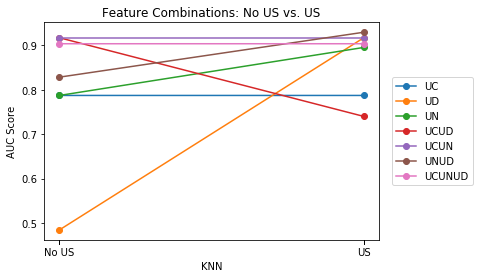

In [123]:
import matplotlib.pyplot as plt
c = 0
for i in range(0, len(x), 2):
    plt.plot(x[i:i+2], y[i:i+2], '-o', label=labels[c])
    
    c += 1

ls = ['No US', '', '', '', '', 'US']

plt.xticks(x, ls)
plt.xlabel("KNN")
plt.ylabel("AUC Score")
plt.title("Feature Combinations: No US vs. US")


## NEED TO FIX: add x and y labels, remove the numbers on x axis, and add in US and NOT US labels at 1 and 2
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()

In [124]:
meanDF

,KNN,NB,DT,SVM,MLP
UC,0.787126,0.788256,0.687132,0.685678,0.543941
UCUS,0.787133,0.799829,0.700490,0.694953,0.526531
UD,0.484464,0.533108,0.478196,0.483133,0.531966
USUD,0.916985,0.846848,0.803919,0.542973,0.854395
UN,0.787126,0.788256,0.687132,0.685678,0.543941
USUN,0.895167,0.835919,0.787111,0.811659,0.500000
UCUD,0.916985,0.846848,0.803919,0.542973,0.854395
UCUSUD,0.739939,0.647087,0.501841,0.546939,0.633512
UCUN,0.916985,0.846848,0.803919,0.543306,0.854395
UCUNUS,0.916985,0.849979,0.812515,0.560393,0.534393


In [125]:
hmeanDF = meanDF

for i in range(len(hmeanDF)):
    print(type(hmeanDF.iloc[i]))
   

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [126]:
pd.io.formats.style.Styler(hmeanDF).highlight_max(color='green')


,KNN,NB,DT,SVM,MLP
UC,0.787126,0.788256,0.687132,0.685678,0.543941
UCUS,0.787133,0.799829,0.70049,0.694953,0.526531
UD,0.484464,0.533108,0.478196,0.483133,0.531966
USUD,0.916985,0.846848,0.803919,0.542973,0.854395
UN,0.787126,0.788256,0.687132,0.685678,0.543941
USUN,0.895167,0.835919,0.787111,0.811659,0.5
UCUD,0.916985,0.846848,0.803919,0.542973,0.854395
UCUSUD,0.739939,0.647087,0.501841,0.546939,0.633512
UCUN,0.916985,0.846848,0.803919,0.543306,0.854395
UCUNUS,0.916985,0.849979,0.812515,0.560393,0.534393


In [127]:
pd.io.formats.style.Styler(hmeanDF).highlight_max(color='green', axis=1)

,KNN,NB,DT,SVM,MLP
UC,0.787126,0.788256,0.687132,0.685678,0.543941
UCUS,0.787133,0.799829,0.70049,0.694953,0.526531
UD,0.484464,0.533108,0.478196,0.483133,0.531966
USUD,0.916985,0.846848,0.803919,0.542973,0.854395
UN,0.787126,0.788256,0.687132,0.685678,0.543941
USUN,0.895167,0.835919,0.787111,0.811659,0.5
UCUD,0.916985,0.846848,0.803919,0.542973,0.854395
UCUSUD,0.739939,0.647087,0.501841,0.546939,0.633512
UCUN,0.916985,0.846848,0.803919,0.543306,0.854395
UCUNUS,0.916985,0.849979,0.812515,0.560393,0.534393


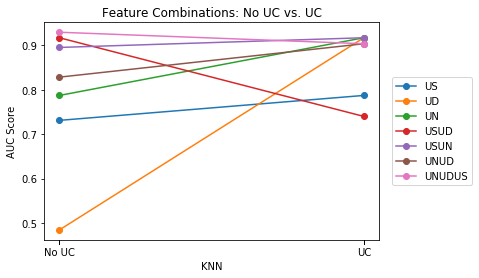

In [128]:
ucMeanDF = meanDF.reindex(['US', 'UCUS', 'UD', 'UCUD', 'UN', 'UCUN', 'USUD', 'UCUSUD', 'USUN', 'UCUNUS', 
                 'UNUD', 'UCUNUD', 'UNUDUS', 'UCUNUDUS', 'UC'])

labels = []
y = list(ucMeanDF['KNN'].values)[:-1]
x = []
for i in range(len(ucMeanDF['KNN']) - 1):
    if i % 2 == 0:
        x.append(1)
        labels.append(list(ucMeanDF.index)[i])
    else:
        x.append(2)
        
        
c = 0
for i in range(0, len(x), 2):
    plt.plot(x[i:i+2], y[i:i+2], '-o', label=labels[c])
    
    c += 1

ls = ['No UC', '', '', '', '', 'UC']

plt.xticks(x, ls)
plt.xlabel("KNN")
plt.ylabel("AUC Score")
plt.title("Feature Combinations: No UC vs. UC")


## NEED TO FIX: add x and y labels, remove the numbers on x axis, and add in US and NOT US labels at 1 and 2
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.show()